# Opportunity analysis of sports using log optimal betting strategy

## Load Libraries

In [1]:
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import cvxpy as cp
%matplotlib inline
import math
import importlib as imp
import bettingLib as bl
import riskMeasuresAndTools as rm
import time

## Figure out the minimum win prob per bet it would take to realize an expected return of .5% as a function of the number of bets you can make in a given week

In [2]:
start = time.time()
imp.reload(bl)
nVals = 50
ns = [n for n in range(1,nVals+1)]
vig = .02
probs = np.zeros(len(ns))
amountBet = np.zeros(len(ns))
cutoff = .005
for i in range(len(ns)):
    probs[i], amountBet[i] = bl.calc_breakeven_prob(vig, ns[i], cutoff=cutoff)
    if (i%10 == 0):
        print ('i = ' + str(i) + ' Time elapsed = ' + str((time.time() - start)/60.) + ' minutes')

i = 0 Time elapsed = 0.001733072598775228 minutes
i = 10 Time elapsed = 0.07822235027949015 minutes
i = 20 Time elapsed = 0.24653609991073608 minutes
i = 30 Time elapsed = 0.5233547528584798 minutes
i = 40 Time elapsed = 0.9224754691123962 minutes


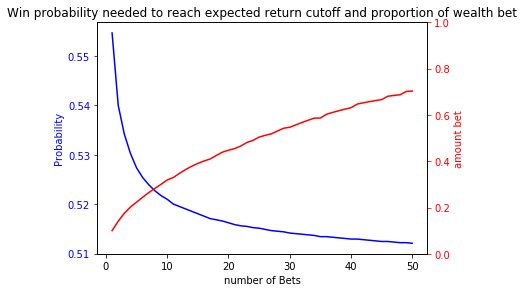

In [3]:
fig, ax1 = plt.subplots()
ax1.plot(ns, probs, 'b')
ax1.set_xlabel('number of Bets')
ax1.set_ylabel('Probability', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.plot(ns, amountBet, 'r')
ax2.set_ylabel('amount bet', color='r')
ax2.set_ylim(0, 1)
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Win probability needed to reach expected return cutoff and proportion of wealth bet')
plt.show()

## Run Monte Carlo Simulations to figure out what the final wealth distribution is given the following quantities
* probWinningAGivenBet: probability you win a bet
* numBetsPerWeek: number of bets you can make per week
* The simulation assumes that you will bet the log optimal amount each week independent of your wealth at that point

In [4]:
probWinningAGivenBet = .55
numBetsPerWeek = 8
listOfTimeStepsToRecord = [x for x in range(0,16)]

In [6]:
imp.reload(bl)
dfProb = bl.make_df_prob(probWinningAGivenBet)
dfDistributionsNoMother = bl.simulate_wealth_paths(dfProb, numBetsPerWeek, listOfTimeStepsToRecord, vig = .02, numSim = 10000, lowerBound = 0.)

Here are the simulation conditions
During each time period, the player places 8 bets
Each bet has a win probability of 55.00000000000001%
Each bet made will be for 8.537160135084463% of the players wealth
Each winning bet will return 98.0% of the amount bet 
It runs 10000 independent monte-carlo simulations
It records the wealth distribution after the following time steps [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [7]:
dfDistributionsNoMother.head(10)

,Time 0,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,Time 10,Time 11,Time 12,Time 13,Time 14,Time 15
0,1.0,0.824135,0.957814,1.436987,0.941368,0.934939,1.086592,1.630189,2.445737,2.842450,1.862085,1.534609,0.745916,0.866909,0.860988,1.000645
1,1.0,1.331242,0.647067,0.423893,0.277692,0.228855,0.265977,0.264161,0.307009,0.356808,0.294058,0.341755,0.512728,0.509226,0.419671,0.416805
2,1.0,1.331242,1.772205,1.760101,1.748080,2.031629,2.361172,3.143291,3.121823,3.100502,3.079326,3.058295,3.037408,3.016663,3.505984,2.296766
3,1.0,0.993170,0.818506,0.674559,0.783976,0.646102,0.750904,0.364986,0.177406,0.086231,0.071066,0.070580,0.070098,0.069620,0.045608,0.053006
4,1.0,0.993170,1.490031,1.479855,2.220193,1.829737,1.817241,2.112008,2.811594,3.742911,3.084662,3.063595,4.078385,4.739924,5.508768,4.539966
5,1.0,0.824135,1.097122,0.533271,0.529628,0.615537,0.507286,0.675320,0.556554,0.458676,0.610608,0.916082,1.219526,1.623484,1.886823,2.192878
6,1.0,0.824135,1.236431,1.018985,1.528760,1.259904,1.464268,1.454268,2.181805,2.166904,1.785820,2.075491,2.412149,2.803414,2.310390,2.294611
7,1.0,0.655099,0.761360,0.884857,1.177958,1.369030,0.665435,0.885855,0.730064,0.971891,1.129538,1.503688,2.255949,3.003214,1.459751,0.956281
8,1.0,1.162206,1.350723,1.341498,1.785858,1.471787,1.710520,1.698838,1.400071,1.863833,2.166158,1.785205,1.773013,1.461201,2.192207,1.065551
9,1.0,0.993170,0.650625,0.646181,0.532540,0.528903,0.614694,0.610496,0.399935,0.397204,0.461633,0.380447,0.442158,0.513879,0.684097,0.563788


In [8]:
imp.reload(rm)
rm.full_report(dfDistributionsNoMother[['Time 5', 'Time 10', 'Time 15']],
               goal=1.2, alpha=.05)

,Time 5,Time 10,Time 15
Average Wealth,1.342261,1.802920,2.406595
Vol of Wealth,0.699325,1.414862,2.459023
Prob of Making Money,0.632200,0.675800,0.704900
Prob of Meeting Goal,0.511200,0.588600,0.635000
Average Wealth Conditional On Losing Money,0.699290,0.629377,0.591619


In [14]:
imp.reload(bl)
dfDistributionsWithMother = bl.simulate_wealth_paths(dfProb, numBetsPerWeek, listOfTimeStepsToRecord, 
                                                   vig = .02, numSim = 10000, lowerBound = .7)

Here are the simulation conditions
During each time period, the player places 8 bets
Each bet has a win probability of 55.00000000000001%
Each bet made will be for 8.53716019490401% of the players wealth
Each winning bet will return 98.0% of the amount bet 
It runs 10000 independent monte-carlo simulations
It records the wealth distribution after the following time steps [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [15]:
dfDistributionsWithMother.head()

,Time 0,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,Time 10,Time 11,Time 12,Time 13,Time 14,Time 15
0,1.0,1.162206,1.154268,1.146385,1.138556,1.130780,0.549630,0.549630,0.549630,0.549630,0.549630,0.549630,0.549630,0.549630,0.549630,0.549630
1,1.0,1.331242,1.547177,1.275082,1.697443,1.398921,1.625835,1.339906,1.557247,1.283381,1.274616,2.127734,2.832528,4.249578,4.938885,6.574851
2,1.0,0.993170,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625,0.650625
3,1.0,0.993170,0.986387,0.812916,0.669952,0.669952,0.669952,0.669952,0.669952,0.669952,0.669952,0.669952,0.669952,0.669952,0.669952,0.669952
4,1.0,1.162206,0.761360,0.627463,0.627463,0.627463,0.627463,0.627463,0.627463,0.627463,0.627463,0.627463,0.627463,0.627463,0.627463,0.627463


In [16]:
imp.reload(rm)
rm.full_report(dfDistributionsWithMother[['Time 5', 'Time 10', 'Time 15']],
               goal=1.2, alpha=.05)

,Time 5,Time 10,Time 15
Average Wealth,1.301680,1.670754,2.137086
Vol of Wealth,0.704556,1.460287,2.442884
Prob of Making Money,0.590900,0.552600,0.524900
Prob of Meeting Goal,0.484700,0.498000,0.493700
Average Wealth Conditional On Losing Money,0.684741,0.636180,0.618873


# Plot Histograms of whichever wealth distribution you would like to look at

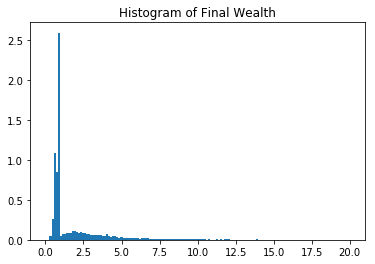

In [12]:
plt.hist(dfDistributionsWithMother['Time 15'], bins = 150, range=(0,20),density=True)
plt.title('Histogram of Final Wealth')
plt.show()

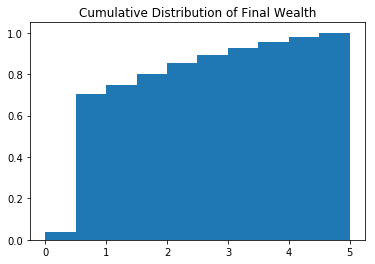

In [13]:
plt.hist(dfDistributionsWithMother['Time 15'], range=(0,5), density=True, cumulative=True)
plt.title('Cumulative Distribution of Final Wealth')
plt.show()